In [2]:
import pandas as pd

df = pd.read_csv('F:/CollisionAvoidance-Carla-DRL-MPC/logs/1709461045-recurrentPPO-90kmh-transfer/monitor_1.csv', skiprows=1)
df1 = pd.read_csv('F:/CollisionAvoidance-Carla-DRL-MPC/logs/1709461045-recurrentPPO-90kmh-transfer/monitor_2.csv', skiprows=1)
df2 = pd.read_csv('F:/CollisionAvoidance-Carla-DRL-MPC/logs/1709461045-recurrentPPO-90kmh-transfer/monitor_3.csv', skiprows=1)
df3 = pd.read_csv('F:/CollisionAvoidance-Carla-DRL-MPC/logs/1709461045-recurrentPPO-90kmh-transfer/monitor.csv', skiprows=1)

In [3]:
ep = pd.concat([df,df1, df2, df3])

In [4]:
ep = ep.reset_index()

In [5]:
ep

,index,r,l,t
0,0,6.326943,5,26.773363
1,1,-69.979338,9,42.523335
2,2,6.262953,5,58.544970
3,3,3.184442,4,77.720932
4,4,-70.300334,10,98.199076
...,...,...,...,...
4331,615,545.813771,48,25542.182454
4332,616,586.152743,49,25649.895481
4333,617,-16.045276,15,25681.541092
4334,618,77.127771,16,25713.049335


In [7]:
from scipy import stats
import numpy as np

df = ep[np.abs(stats.zscore(ep['r'])) < 3]

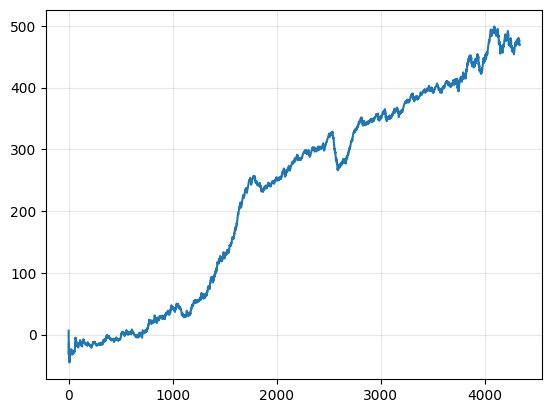

In [8]:
import pandas as pd
import matplotlib.pyplot as plt


smooth = df.ewm(alpha=(1 - 0.99)).mean()


# plt.plot(df["Value"], alpha=0.4)
plt.plot(smooth["r"])
# plt.ylim(bottom = 0, top=12.5)
plt.grid(alpha=0.3)

plt.show()

In [12]:
from bokeh.io import output_notebook

output_notebook()

Loading BokehJS ...

In [15]:

from bokeh.plotting import figure, show
from scipy.interpolate import make_interp_spline
import numpy as np
 
p = figure(
            width=1110, 
            height=350, 
            background_fill_color="#fafafa",
            title='Hybrid Approach - Reward per Episode',
            x_axis_label='Episode',
            y_axis_label='Reward',)
            # y_range=(-0.61, 0.61))

# generate some values
smooth = df.ewm(alpha=(1 - 0.99)).mean()
x = smooth.index
y = smooth['r']


# add a line renderer and legend to the plot
p.line(x, y, line_color='red', line_width=2)
# p.legend.location = "top_right"


# show the results
show(p)

In [18]:
from bokeh.io import export_svgs

# option 1
p.output_backend = "svg"

# option 2
export_svgs(p, filename="rew-episode-mpc.svg")

['rew-episode-mpc.svg']

In [1]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
folder = 'F:/CollisionAvoidance-Carla-DRL-MPC/logs/1709461045-recurrentPPO-50kmh/evaluation/'
with open(folder + 'logger.csv', 'r') as file:
    lines = file.readlines()
processed_data = []
for line in lines:
    # Remove quotes and newline characters
    clean_line = line.strip().strip('"')
    records = clean_line.split('","')
    processed_data.append(records)

# # Create DataFrame
# df = pd.DataFrame(processed_data)
# Convert each string to a list
lk = []
for x in processed_data[1:]:
    data_lists = [ast.literal_eval(item) for item in x]
    lk.append(data_lists)
# Create a DataFrame
df = pd.DataFrame()
for k in range(len(lk)):
    df = pd.concat([df, pd.DataFrame(lk[k])])

In [2]:
df.columns = ['Episode', 'des_speed', 'last_v', 'ttc', 'distance_parked', 'timestep', 'X', 'Y', 'X_dist', 'Y_dist', 'Speed', 'Acceleration','acceleration x', 'acceleration y', 'sideslip', 'Yaw', 'Steer']
cols_list = df.columns[1:].tolist()

df2 = df[df['last_v']>0]
episode_data = df2[df2['Episode'] == 3]

episode_data = episode_data[episode_data['Y_dist']>-30]
episode_data = episode_data.reset_index()


In [3]:
episode_data

,index,Episode,des_speed,last_v,ttc,distance_parked,timestep,X,Y,X_dist,Y_dist,Speed,Acceleration,acceleration x,acceleration y,sideslip,Yaw,Steer
0,44,3,15.0,14.031476,1,35,201,-16.890013,-218.422028,0.502611,-29.936813,7.709486,2.000000,0.016611,4.759826,0.000815,1.570362,-0.000509
1,45,3,15.0,14.031476,1,35,231,-16.889631,-217.897400,0.502993,-29.412186,7.989906,2.000000,0.006808,4.206290,0.000843,1.570204,-0.000355
2,46,3,15.0,14.031476,1,35,212,-16.889193,-217.352631,0.503431,-28.867416,8.307958,2.000000,0.009274,4.770777,0.000886,1.570107,-0.000266
3,47,3,15.0,14.031476,1,35,209,-16.888689,-216.787903,0.503935,-28.302689,8.593802,2.000000,0.019087,4.287643,0.001004,1.570002,-0.000345
4,48,3,15.0,14.031476,1,35,200,-16.888092,-216.202820,0.504532,-27.717606,8.912831,2.000000,0.024019,4.785404,0.001148,1.569880,-0.000383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,124,3,15.0,14.031473,1,35,345,-14.459247,-174.806351,2.933377,13.678864,5.021818,0.077882,-0.020582,-0.020885,0.011309,1.555631,0.004012
81,125,3,15.0,14.031473,1,35,374,-14.455141,-174.473251,2.937483,14.011963,5.006434,0.077895,-0.007138,-0.230706,0.011249,1.556537,0.003220
82,126,3,15.0,14.031473,1,35,314,-14.451246,-174.139679,2.941378,14.345535,4.942876,0.079426,-0.045926,-0.952899,0.010774,1.557198,0.003059
83,127,3,15.0,14.031473,1,35,311,-14.447747,-173.806305,2.944877,14.678909,5.013073,0.086231,-0.095491,1.053965,0.009353,1.557825,0.004013


In [9]:
df.columns = ['Episode', 'des_speed', 'last_v', 'ttc', 'distance_parked', 'timestep', 'X', 'Y', 'X_dist', 'Y_dist', 'Speed', 'Acceleration','acceleration x', 'acceleration y', 'sideslip', 'Yaw', 'Steer']
cols_list = df.columns[1:].tolist()

df2 = df[df['last_v']>0]
episode_data = df2[df2['Episode'] == 3]


episode_data = episode_data[episode_data['Y_dist']>-30]
episode_data = episode_data.reset_index()

episode_data['X'] = episode_data['X'].apply(lambda x: x -episode_data['X'][0])
episode_data['Y'] = episode_data['Y'].apply(lambda x: x -episode_data['Y'][0])

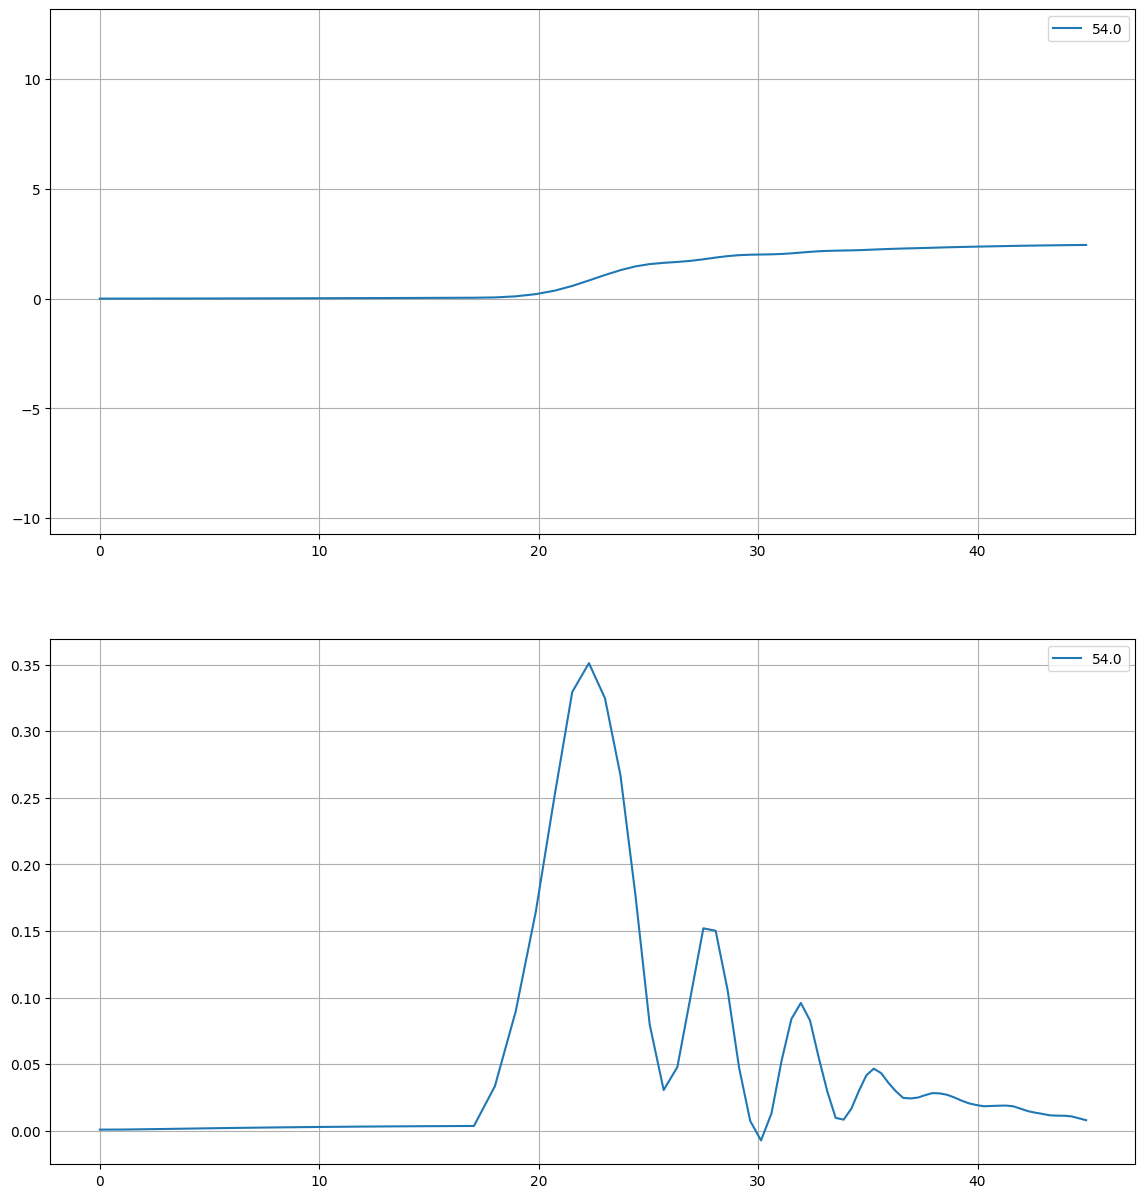

In [10]:
fig , axes = plt.subplots(2,1,figsize=(14,15))

for vec in episode_data['des_speed'].unique():

    df_plot = episode_data[episode_data['des_speed'] == vec]

    axes[0].plot(df_plot['Y'], df_plot['X'],  label=vec*3.6)
    axes[0].grid(True)
    axes[0].axis("equal")
    # axes[0].xlabel("x")
    # axes[0].ylabel("y")
    # axes[0].set(ylim=(-4.5,4.5))
    # axes[0].set(xlim=(-170,-120))
    axes[0].legend()


    axes[1].plot(df_plot['Y'], df_plot['sideslip'],  label=vec*3.6)
    axes[1].grid(True)
    axes[0].axis("equal")
    # axes[0].xlabel("x")
    # # axes[0].ylabel("y")
    # axes[1].set(ylim=(-0.25,0.4))
    # axes[1].set(xlim=(-170,-120))
    axes[1].legend()


In [12]:
episode_data.to_csv(folder+'50kmh-mpc.csv')

In [52]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1,20.0,0.000000,1,60,66,-16.893116,-223.484940,0.500137,-59.999756,0.163215,2.000000,0.238707,-0.008607,1.000000,1.589613,-0.021859
1,1,20.0,0.000000,1,60,139,-16.893078,-223.484818,0.500175,-59.999634,0.257535,2.000000,-0.233125,0.008961,1.000000,1.589612,-0.020346
2,1,20.0,0.000000,1,60,142,-16.893040,-223.484879,0.500214,-59.999695,0.229836,1.999999,-0.046976,0.001341,-1.000000,1.589613,-0.017598
3,1,20.0,0.000000,1,60,150,-16.893026,-223.484970,0.500227,-59.999786,0.172555,1.999999,0.000048,-0.000264,-1.000000,1.589614,-0.015485
4,1,20.0,0.000000,1,60,144,-16.893023,-223.485031,0.500231,-59.999847,0.118996,1.999999,0.009507,-0.000407,-1.000000,1.589614,-0.015073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,13,20.0,18.968239,1,60,232,-14.032418,-149.637497,3.360206,13.847717,5.050815,0.078020,-0.124314,0.665238,-0.000502,1.568869,0.002952
140,13,20.0,18.968239,1,60,534,-14.032799,-149.302841,3.359825,14.182373,5.031046,0.075106,-0.158251,-0.296817,-0.002601,1.569635,0.004579
141,13,20.0,18.968239,1,60,229,-14.033762,-148.967361,3.358862,14.517853,5.059542,0.076035,-0.154012,0.426922,-0.004615,1.570640,0.005367
142,13,20.0,18.968239,1,60,244,-14.035085,-148.633987,3.357539,14.851227,5.014178,0.073546,-0.068787,-0.680816,-0.005572,1.571701,0.005187


In [53]:
df.columns = ['Episode', 'des_speed', 'last_v', 'ttc', 'distance_parked', 'timestep', 'X', 'Y', 'X_dist', 'Y_dist', 'Speed', 'Acceleration','acceleration x', 'acceleration y', 'sideslip', 'Yaw', 'Steer']
cols_list = df.columns[1:].tolist()

In [54]:
df1 = df[df['ttc']==1]

In [55]:
df2 = df1[df1['last_v']>0]

In [56]:
df2

,Episode,des_speed,last_v,ttc,distance_parked,timestep,X,Y,X_dist,Y_dist,Speed,Acceleration,acceleration x,acceleration y,sideslip,Yaw,Steer
0,2,20.0,18.968243,1,60,66,-16.893116,-223.484940,0.500137,-59.999756,0.163215,2.000000,0.238707,-0.008607,1.000000,1.589613,-0.021859
1,2,20.0,18.968243,1,60,155,-16.893078,-223.484818,0.500175,-59.999634,0.257535,2.000000,-0.233125,0.008961,1.000000,1.589612,-0.020346
2,2,20.0,18.968243,1,60,174,-16.893040,-223.484879,0.500214,-59.999695,0.229836,1.999999,-0.046976,0.001341,-1.000000,1.589613,-0.017598
3,2,20.0,18.968243,1,60,177,-16.893026,-223.484970,0.500227,-59.999786,0.172555,1.999999,0.000048,-0.000264,-1.000000,1.589614,-0.015485
4,2,20.0,18.968243,1,60,168,-16.893023,-223.485031,0.500231,-59.999847,0.118996,1.999999,0.009507,-0.000407,-1.000000,1.589614,-0.015073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,13,20.0,18.968239,1,60,232,-14.032418,-149.637497,3.360206,13.847717,5.050815,0.078020,-0.124314,0.665238,-0.000502,1.568869,0.002952
140,13,20.0,18.968239,1,60,534,-14.032799,-149.302841,3.359825,14.182373,5.031046,0.075106,-0.158251,-0.296817,-0.002601,1.569635,0.004579
141,13,20.0,18.968239,1,60,229,-14.033762,-148.967361,3.358862,14.517853,5.059542,0.076035,-0.154012,0.426922,-0.004615,1.570640,0.005367
142,13,20.0,18.968239,1,60,244,-14.035085,-148.633987,3.357539,14.851227,5.014178,0.073546,-0.068787,-0.680816,-0.005572,1.571701,0.005187


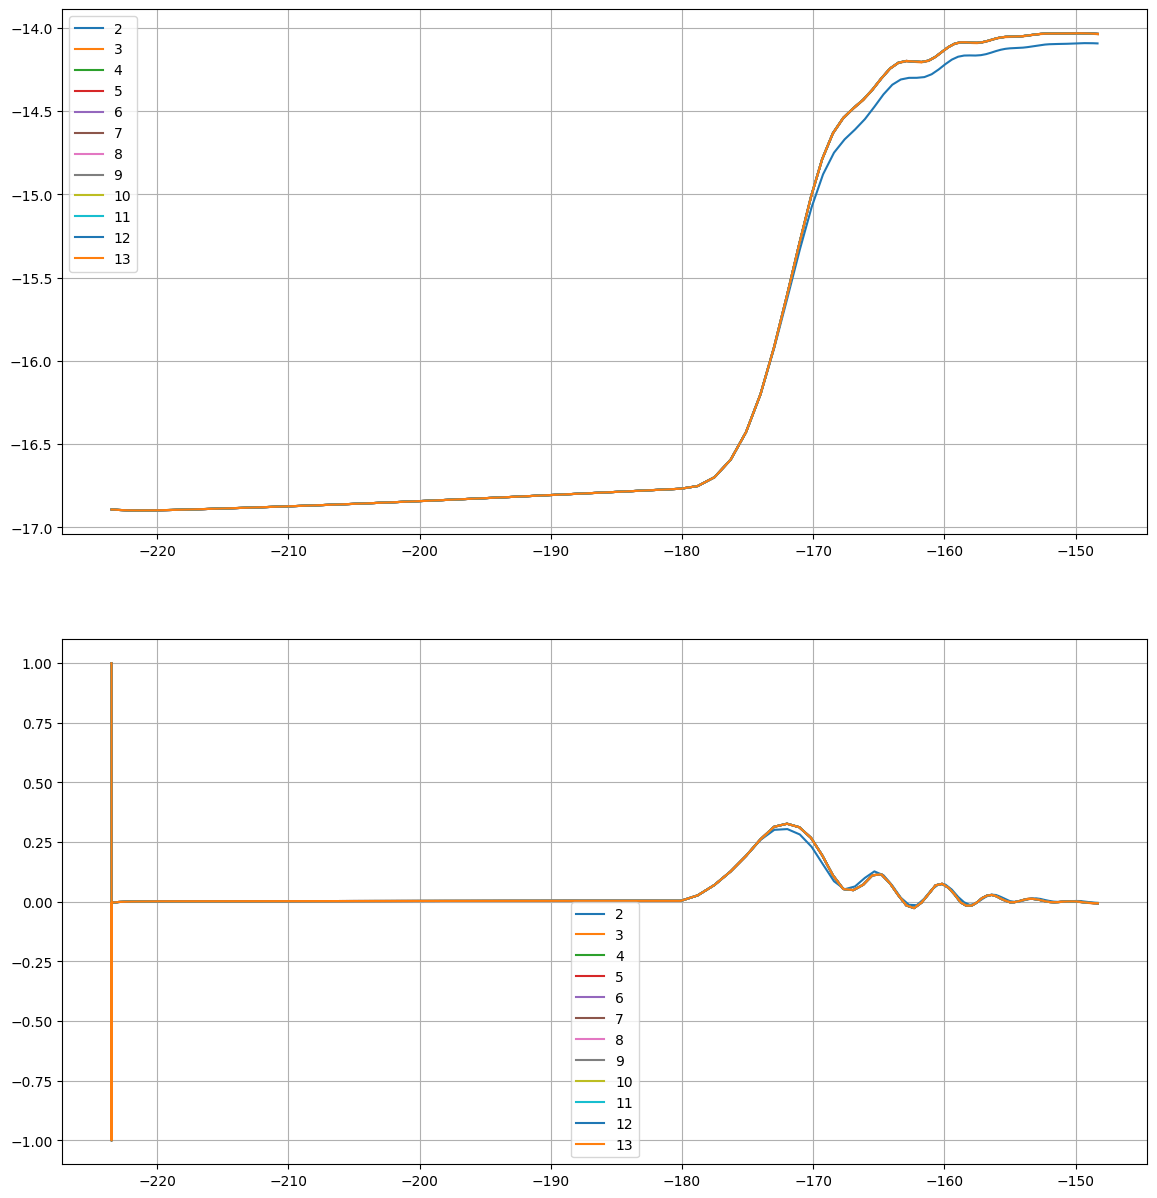

In [57]:
fig , axes = plt.subplots(2,1,figsize=(14,15))

for vec in df2['Episode'].unique():

    df_plot = df2[df2['Episode'] == vec]

    axes[0].plot(df_plot['Y'], df_plot['X'],  label=vec)
    axes[0].grid(True)
    # axes[0].axis("equal")
    # axes[0].xlabel("x")
    # axes[0].ylabel("y")
    # axes[0].set(ylim=(-3.5,3.5))
    # axes[0].set(xlim=(-170,-120))
    axes[0].legend()


    axes[1].plot(df_plot['Y'], df_plot['sideslip'],  label=vec)
    axes[1].grid(True)
    # axes[0].axis("equal")
    # axes[0].xlabel("x")
    # # axes[0].ylabel("y")
    # axes[1].set(ylim=(-0.25,0.4))
    # axes[1].set(xlim=(-170,-120))
    axes[1].legend()


In [59]:
episode_data = df2[df2['Episode'] == 3]

In [60]:
episode_data['des_speed'].unique()

array([20.])

In [69]:
episode_data['X'] = episode_data['X'].apply(lambda x: x -episode_data['X'][0])

KeyError: 0

In [ ]:
episode_data['Y'] = episode_data['Y'].apply(lambda x: x -episode_data['Y'][0])

C:\Users\gusta\AppData\Local\Temp\ipykernel_16168\948111524.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  episode_data['Y'] = episode_data['Y'].apply(lambda x: x -episode_data['Y'][0])


In [67]:
episode_data = episode_data[episode_data['Y_dist']>-15]

In [ ]:
episode_data

,Episode,des_speed,last_v,ttc,distance_parked,timestep,X,Y,X_dist,Y_dist,Speed,Acceleration,acceleration x,acceleration y,sideslip,Yaw,Steer
88,3,20.0,18.968243,1,60,212,0.193592,45.954987,0.693100,-14.044739,18.994616,-1.161031,12.261497,-5.501117,0.070327,1.519621,-0.393365
89,3,20.0,18.968243,1,60,207,0.298969,47.190216,0.798477,-12.809509,18.276437,-1.267011,14.766423,-12.284488,0.127234,1.454322,-0.350009
90,3,20.0,18.968243,1,60,232,0.464790,48.363708,0.964298,-11.636017,17.405013,-1.236692,15.136705,-15.673083,0.192392,1.368958,-0.296530
91,3,20.0,18.968243,1,60,450,0.692793,49.467819,1.192301,-10.531906,16.534118,-1.178504,14.317853,-16.710289,0.261932,1.273481,-0.233047
92,3,20.0,18.968243,1,60,203,0.975781,50.504578,1.475289,-9.495148,15.809386,-1.035795,9.089176,-14.029240,0.314172,1.182734,-0.054947
93,3,20.0,18.968243,1,60,222,1.286278,51.488297,1.785786,-8.511429,15.178464,-0.875681,-0.209398,-9.902429,0.326701,1.128050,0.219253
94,3,20.0,18.968243,1,60,449,1.595807,52.424927,2.095315,-7.574799,14.494599,-0.738777,-6.400938,-8.687052,0.311707,1.127910,0.399128
95,3,20.0,18.968243,1,60,341,1.877440,53.317154,2.376948,-6.682571,13.725820,-0.617228,-12.384427,-8.340496,0.266984,1.179703,0.460249
96,3,20.0,18.968243,1,60,339,2.102710,54.168335,2.602218,-5.831390,12.897548,-0.505383,-17.060261,-8.749751,0.193872,1.267424,0.418829
97,3,20.0,18.968243,1,60,334,2.257138,54.984299,2.756646,-5.015427,12.235259,-0.423868,-17.076170,-7.424254,0.110287,1.371808,0.304843


In [64]:
episode_data.to_csv(folder+'70kmh-mpc.csv')

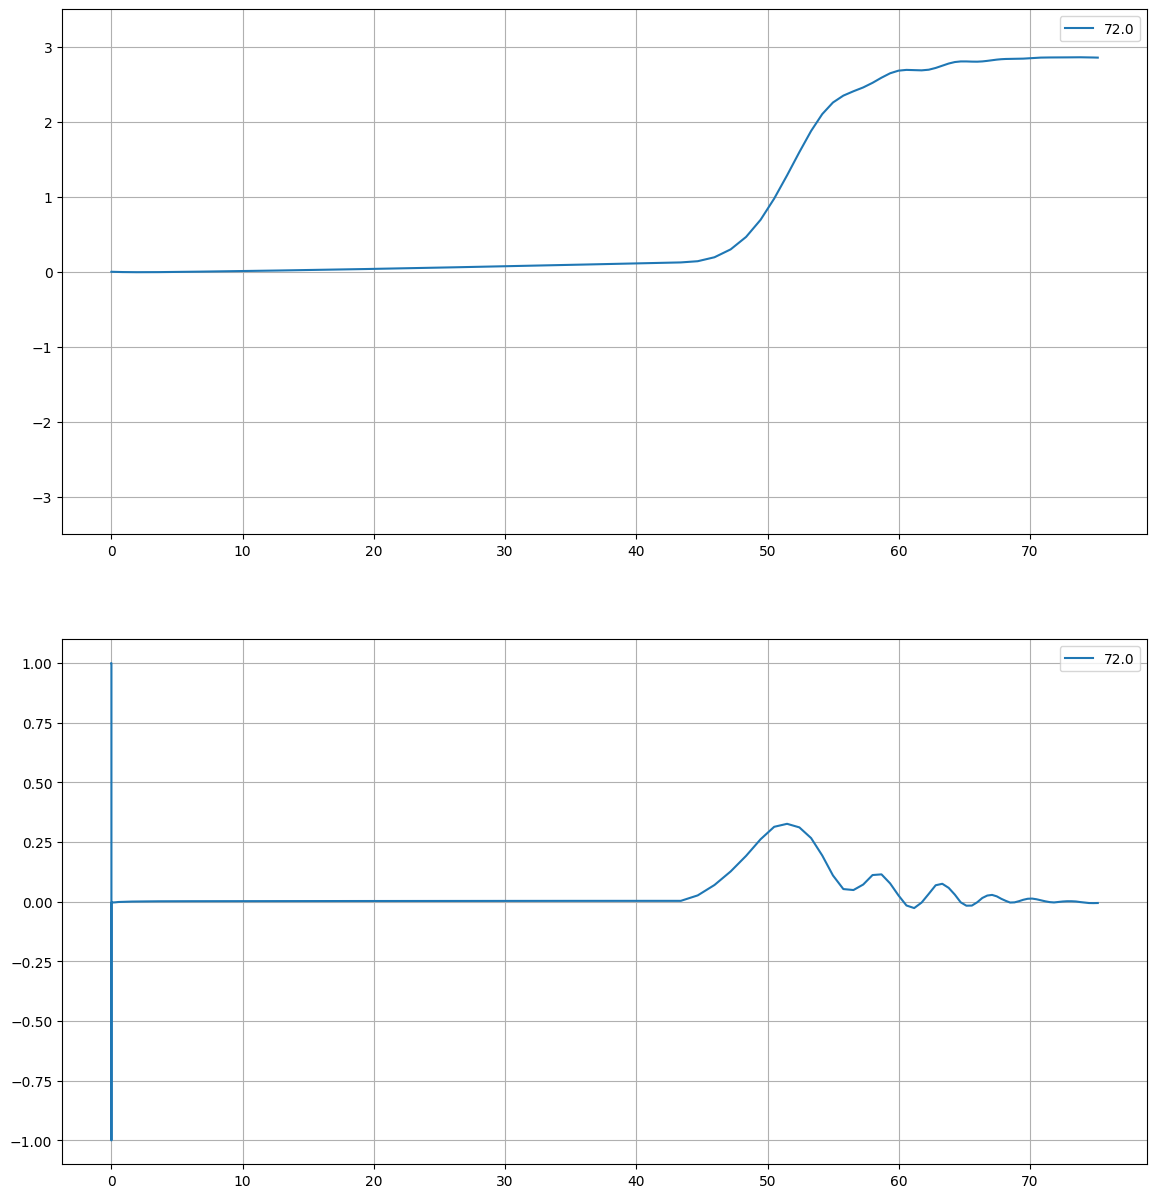

In [65]:
fig , axes = plt.subplots(2,1,figsize=(14,15))

for vec in episode_data['des_speed'].unique():

    df_plot = episode_data[episode_data['des_speed'] == vec]

    axes[0].plot(df_plot['Y'], df_plot['X'],  label=vec*3.6)
    axes[0].grid(True)
    # axes[0].axis("equal")
    # axes[0].xlabel("x")
    # axes[0].ylabel("y")
    axes[0].set(ylim=(-3.5,3.5))
    # axes[0].set(xlim=(-170,-120))
    axes[0].legend()


    axes[1].plot(df_plot['Y'], df_plot['sideslip'],  label=vec*3.6)
    axes[1].grid(True)
    # axes[0].axis("equal")
    # axes[0].xlabel("x")
    # # axes[0].ylabel("y")
    # axes[1].set(ylim=(-0.25,0.4))
    # axes[1].set(xlim=(-170,-120))
    axes[1].legend()



<Axes: xlabel='Y'>

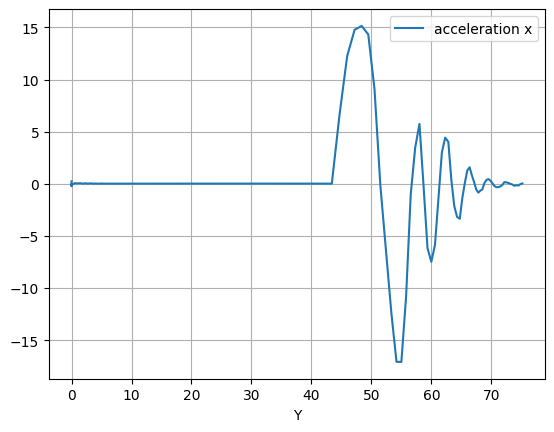

In [66]:
episode_data.plot(x='Y', y='acceleration x', grid=True, legend='des_speed')

In [2]:
episode_data = df[df['Episode'] == 5]

In [7]:
episode_data

,Episode,X,Y,X_dist,Y_dist,Speed,Acceleration,acceleration x,acceleration y,sideslip,Yaw,Steer
0,5,0.000000,0.000000,0.500000,-80.000000,3.087946,2.000000,-0.000046,-0.000002,-1.000000,1.589615,-0.020856
1,5,0.000629,0.000565,0.500629,-79.999435,0.203042,2.000000,0.563798,-0.019677,1.000000,1.589610,-0.018013
2,5,0.000767,0.000671,0.500767,-79.999329,0.243030,1.999999,-0.156742,0.005060,-1.000000,1.589607,-0.014759
3,5,0.000824,0.000397,0.500824,-79.999603,0.160335,2.000000,0.008998,-0.000783,-1.000000,1.589612,-0.013699
4,5,0.000830,0.000214,0.500206,-80.000412,0.088518,2.000000,0.020543,-0.000769,-1.000000,1.589614,-0.013714
...,...,...,...,...,...,...,...,...,...,...,...,...
145,5,0.678143,93.981598,1.177427,13.981659,5.009674,0.068113,-0.046620,-0.025454,-0.154291,1.718319,0.007225
146,5,0.640047,94.228531,1.139332,14.228592,5.002982,0.068068,-0.117680,-0.153856,-0.155689,1.719822,0.007621
147,5,0.601542,94.475616,1.100826,14.475677,5.008327,0.068454,-0.057358,0.099201,-0.156101,1.720764,0.006411
148,5,0.562893,94.722549,1.062178,14.722610,5.002713,0.068298,-0.044597,-0.120716,-0.156729,1.721622,0.006288


<Axes: xlabel='Y'>

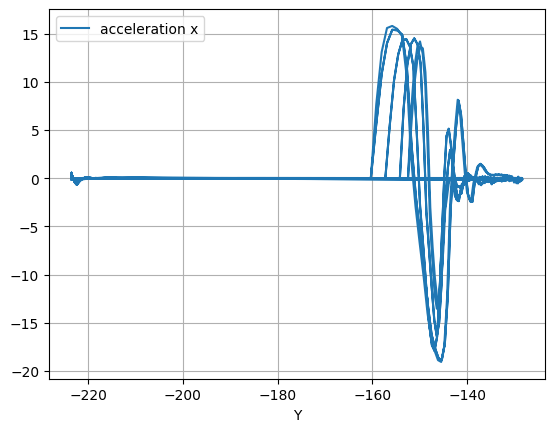

In [4]:
episode_data['Y'] = episode_data['Y'].apply(lambda x: x -episode_data['Y'][0])

C:\Users\gusta\AppData\Local\Temp\ipykernel_17768\948111524.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  episode_data['Y'] = episode_data['Y'].apply(lambda x: x -episode_data['Y'][0])


In [5]:
episode_data['X'] = episode_data['X'].apply(lambda x: x -episode_data['X'][0])

C:\Users\gusta\AppData\Local\Temp\ipykernel_17768\2947286949.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  episode_data['X'] = episode_data['X'].apply(lambda x: x -episode_data['X'][0])


<Axes: xlabel='Y'>

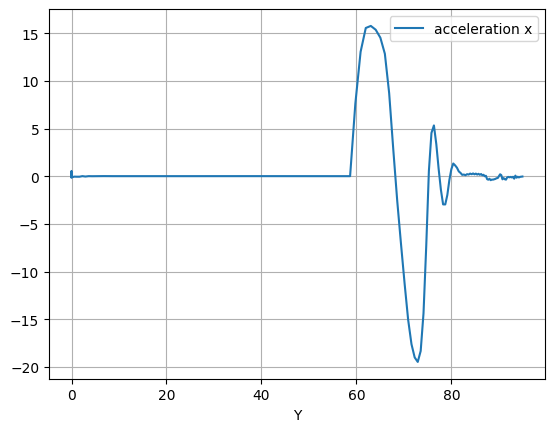

In [10]:
episode_data.plot(x='Y', y='acceleration x', grid=True)

In [1]:
from stable_baselines3 import PPO #PPO

run = '1709461045-recurrentPPO-50kmh'
logdir = f"logs/{run}/evaluation/"


In [2]:
model = PPO.load(f"F:/CollisionAvoidance-Carla-DRL-MPC/logs/{run}/best_model.zip", print_system_info=True)

== CURRENT SYSTEM INFO ==
- OS: Windows-10-10.0.22631-SP0 10.0.22631
- Python: 3.8.18
- Stable-Baselines3: 2.2.1
- PyTorch: 2.1.2+cpu
- GPU Enabled: False
- Numpy: 1.24.4
- Cloudpickle: 3.0.0
- Gymnasium: 0.29.1
- OpenAI Gym: 0.26.2

== SAVED MODEL SYSTEM INFO ==
- OS: Windows-10-10.0.22631-SP0 10.0.22631
- Python: 3.8.18
- Stable-Baselines3: 2.2.1
- PyTorch: 2.1.2+cpu
- GPU Enabled: False
- Numpy: 1.24.4
- Cloudpickle: 3.0.0
- Gymnasium: 0.29.1
- OpenAI Gym: 0.26.2



In [3]:
model.policy

RecurrentActorCriticPolicy(
  (features_extractor): FlattenExtractor(
    (flatten): Flatten(start_dim=1, end_dim=-1)
  )
  (pi_features_extractor): FlattenExtractor(
    (flatten): Flatten(start_dim=1, end_dim=-1)
  )
  (vf_features_extractor): FlattenExtractor(
    (flatten): Flatten(start_dim=1, end_dim=-1)
  )
  (mlp_extractor): MlpExtractor(
    (policy_net): Sequential(
      (0): Linear(in_features=256, out_features=64, bias=True)
      (1): Tanh()
      (2): Linear(in_features=64, out_features=64, bias=True)
      (3): Tanh()
    )
    (value_net): Sequential(
      (0): Linear(in_features=256, out_features=64, bias=True)
      (1): Tanh()
      (2): Linear(in_features=64, out_features=64, bias=True)
      (3): Tanh()
    )
  )
  (action_net): Linear(in_features=64, out_features=5, bias=True)
  (value_net): Linear(in_features=64, out_features=1, bias=True)
  (lstm_actor): LSTM(10, 256)
  (lstm_critic): LSTM(10, 256)
)

In [ ]:
folder = 'F:/CollisionAvoidance-Carla-DRL-MPC/logs/1709461045-recurrentPPO-90kmh-transfer/evaluation/70km_best_model/'

In [11]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
folder = 'F:/CollisionAvoidance-Carla-DRL-MPC/logs/1709461045-recurrentPPO-90kmh-transfer/evaluation/70km_best_model/'
with open(folder + 'logger70.csv', 'r') as file:
    lines = file.readlines()
processed_data = []
for line in lines:
    # Remove quotes and newline characters
    clean_line = line.strip().strip('"')
    records = clean_line.split('","')
    processed_data.append(records)

# # Create DataFrame
# df = pd.DataFrame(processed_data)
# Convert each string to a list
lk = []
for x in processed_data[1:]:
    data_lists = [ast.literal_eval(item) for item in x]
    lk.append(data_lists)
# Create a DataFrame
df = pd.DataFrame()
for k in range(len(lk)):
    df = pd.concat([df, pd.DataFrame(lk[k])])

In [12]:
df.columns = ['Episode', 'des_speed', 'last_v', 'ttc', 'distance_parked', 'timestep', 'X', 'Y', 'X_dist', 'Y_dist', 'Speed', 'Acceleration','acceleration x', 'acceleration y', 'sideslip', 'Yaw', 'Steer']
cols_list = df.columns[1:].tolist()

df2 = df[df['last_v']>0]
episode_data = df2[df2['Episode'] == 5]


episode_data = episode_data[episode_data['Y']>episode_data['Y'].max()-40]
episode_data = episode_data.reset_index()

# episode_data['X'] = episode_data['X'].apply(lambda x: x -episode_data['X'][0])
# episode_data['Y'] = episode_data['Y'].apply(lambda x: x -episode_data['Y'][0])

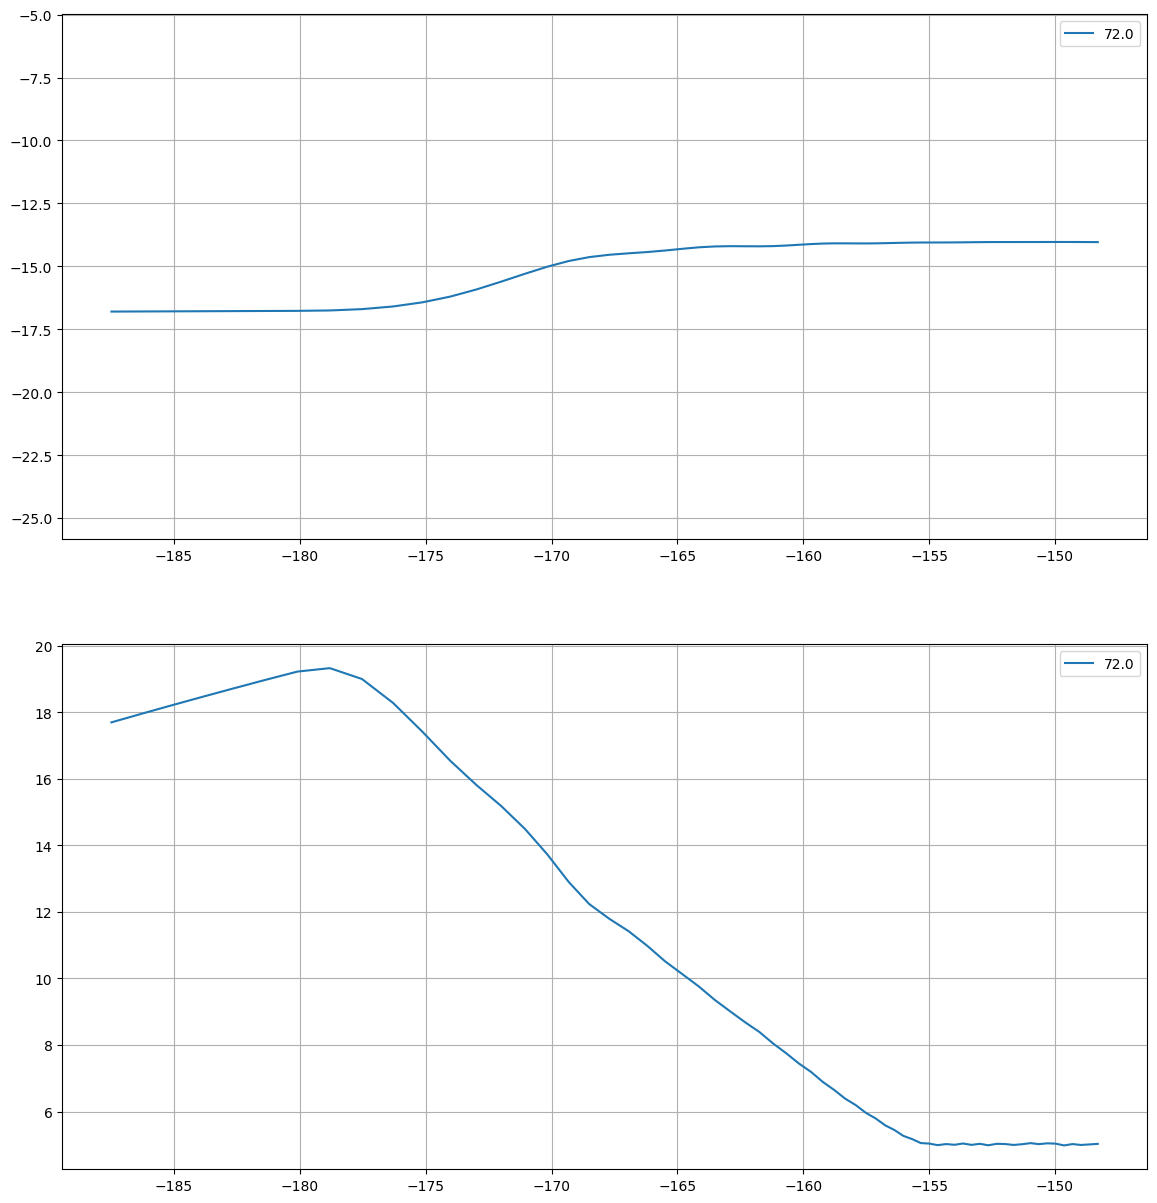

In [13]:
fig , axes = plt.subplots(2,1,figsize=(14,15))

for vec in episode_data['des_speed'].unique():

    df_plot = episode_data[episode_data['des_speed'] == vec]

    axes[0].plot(df_plot['Y'], df_plot['X'],  label=vec*3.6)
    axes[0].grid(True)
    axes[0].axis("equal")
    # axes[0].xlabel("x")
    # axes[0].ylabel("y")
    # axes[0].set(ylim=(-4.5,4.5))
    # axes[0].set(xlim=(-170,-120))
    axes[0].legend()


    axes[1].plot(df_plot['Y'], df_plot['Speed'],  label=vec*3.6)
    axes[1].grid(True)
    # axes[0].axis("equal")
    # axes[0].xlabel("x")
    # # axes[0].ylabel("y")
    # axes[1].set(ylim=(-0.25,0.4))
    # axes[1].set(xlim=(-170,-120))
    axes[1].legend()

In [10]:
episode_data.to_csv(folder+'70kmh-mpc.csv')

In [3]:
pts_list = []
for ep in df2['Episode'].unique():
    pts = df2[df2['Episode'] == ep]
    for i in pts.index:
        pts_list.append([ep, pts['X'][i], pts['Y'][i]])


In [5]:
import argparse
argparser = argparse.ArgumentParser(
    description='CARLA Manual Control Client')
argparser.add_argument(
    '-v', '--verbose',
    action='store_true',
    dest='debug',
    help='print debug information')
argparser.add_argument(
    '--host',
    metavar='H',
    default='127.0.0.1',
    help='IP of the host server (default: 127.0.0.1)')
argparser.add_argument(
    '-p', '--port',
    metavar='P',
    default=2000,
    type=int,
    help='TCP port to listen to (default: 2000)')
argparser.add_argument(
    '-a', '--autopilot',
    action='store_true',
    help='enable autopilot')
argparser.add_argument(
    '--res',
    metavar='WIDTHxHEIGHT',
    default='1280x720',
    help='window resolution (default: 1280x720)')
argparser.add_argument(
    '--filter',
    metavar='PATTERN',
    default='vehicle.*',
    help='actor filter (default: "vehicle.*")')
argparser.add_argument(
    '--rolename',
    metavar='NAME',
    default='hero',
    help='actor role name (default: "hero")')
argparser.add_argument(
    '--gamma',
    default=2.2,
    type=float,
    help='Gamma correction of the camera (default: 2.2)')
argparser.add_argument(
    '--map',
    metavar='NAME',
    default='Town04',
    help='simulation map (default: "Town04")')
argparser.add_argument(
    '--spawn_x',
    metavar='x',
    default='-16.75', #town04 = -16.75
    help='x position to spawn the agent')
argparser.add_argument(
    '--spawn_y',
    metavar='y',
    default='-223.55', #town04 = -223.55
    help='y position to spawn the agent')
argparser.add_argument(
    '--random_spawn',        
    metavar='RS',
    default='0',
    type=int,
    help='Random spawn agent')
argparser.add_argument(
    '--vehicle_id',
    metavar='NAME',
    # default='vehicle.jeep.wrangler_rubicon',
    default='vehicle.tesla.model3',
    help='vehicle to spawn, available options : vehicle.audi.a2 vehicle.audi.tt vehicle.carlamotors.carlacola vehicle.citroen.c3 vehicle.dodge_charger.police vehicle.jeep.wrangler_rubicon vehicle.yamaha.yzf vehicle.nissan.patrol vehicle.gazelle.omafiets vehicle.bh.crossbike vehicle.ford.mustang vehicle.bmw.isetta vehicle.audi.etron vehicle.harley-davidson.low rider vehicle.mercedes-benz.coupe vehicle.bmw.grandtourer vehicle.toyota.prius vehicle.diamondback.century vehicle.tesla.model3 vehicle.seat.leon vehicle.lincoln.mkz2017 vehicle.kawasaki.ninja vehicle.volkswagen.t2 vehicle.nissan.micra vehicle.chevrolet.impala vehicle.mini.cooperst')
argparser.add_argument(
    '--vehicle_wheelbase',
    metavar='NAME',
    type=float,
    default='2.89',
    help='vehicle wheelbase used for model predict control')
argparser.add_argument(
    '--waypoint_resolution',
    metavar='WR',
    default='1',
    type=float,
    help='waypoint resulution for control')
argparser.add_argument(
    '--waypoint_lookahead_distance',
    metavar='WLD',
    default='5.0',
    type=float,
    help='waypoint look ahead distance for control')
argparser.add_argument(
    '--desired_speed',
    metavar='SPEED',
    default='15',
    type=float,
    help='desired speed for highway driving')
argparser.add_argument(
    '--control_mode',
    metavar='CONT',
    default='PID',
    help='Controller')
argparser.add_argument(
    '--planning_horizon',
    metavar='HORIZON',
    type=int,
    default='5',
    help='Planning horizon for MPC')
argparser.add_argument(
    '--time_step',
    metavar='DT',
    default='0.15',
    type=float,
    help='Planning time step for MPC')
argparser.add_argument(
    '--FPS',
    metavar='FPS',
    default='20',
    type=int,
    help='Frame per second for simulation')

args = argparser.parse_args()

args.width, args.height = [int(x) for x in args.res.split('x')]


In [6]:
import carla
import time
from Utils.utils import *
from Utils.HUD import HUD as HUD
from World import World

client = carla.Client(args.host, args.port)
client.set_timeout(100.0)
hud = HUD()
carla_world = client.load_world(args.map)
# carla_world = client.reload_world()
carla_world = client.get_world()
world = World(client, carla_world, hud, args)

pygame 2.5.2 (SDL 2.28.3, Python 3.8.18)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [7]:
world.create_actors()

vehicle spawned
Location(x=0.029219, y=0.000000, z=0.735531)
Vector3D(x=2.395890, y=1.081725, z=0.744160)


In [18]:
world.destroy()

In [8]:
for w in range(2,11):
    ls = [x for x in pts_list if x[0] == w]
    for i in range(len(ls)-1):

        z= ls[i]
        spawn_location_r = carla.Location()
        spawn_location_r.x = float(z[1])
        spawn_location_r.y = float(z[2])
        spawn_location_r.z = 1.0

        zf= ls[i+1]
        spawn_location_f = carla.Location()
        spawn_location_f.x = float(zf[1])
        spawn_location_f.y = float(zf[2])
        spawn_location_f.z = 1.0


        carla_world.debug.draw_line(spawn_location_r, spawn_location_f, thickness=0.1, color=carla.Color(r=255, g=0, b=0), life_time=-1.0, persistent_lines=True)